In [ ]:
pip install tflite-model-maker

In [1]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

In [2]:
image_path = "/content/drive/MyDrive/Datasets"

In [3]:
data = DataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 1383, num_label: 23, labels: Alpinia_galanga, Amaranthus_viridis, Andrographis_paniculata, Artocarpus_heterophyllus, Azadirachta_indica, Basella_alba, Brassica_juncea, Carissa_carandas, Citrus_limon, Curcuma_zedoaria, Ficus_auriculata, Hibiscus_rosa-sinensis, Jasminum_sp, Mangifera_indica, Mentha_sp, Moringa_oleifera, Nyctanthes_arbor-tristis, Ocimum_tenuiflorum, Piper_betle, Plectranthus_amboinicus, Pongamia_pinnata, Psidium_guajava, Tinospora_cordifolia.


In [4]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

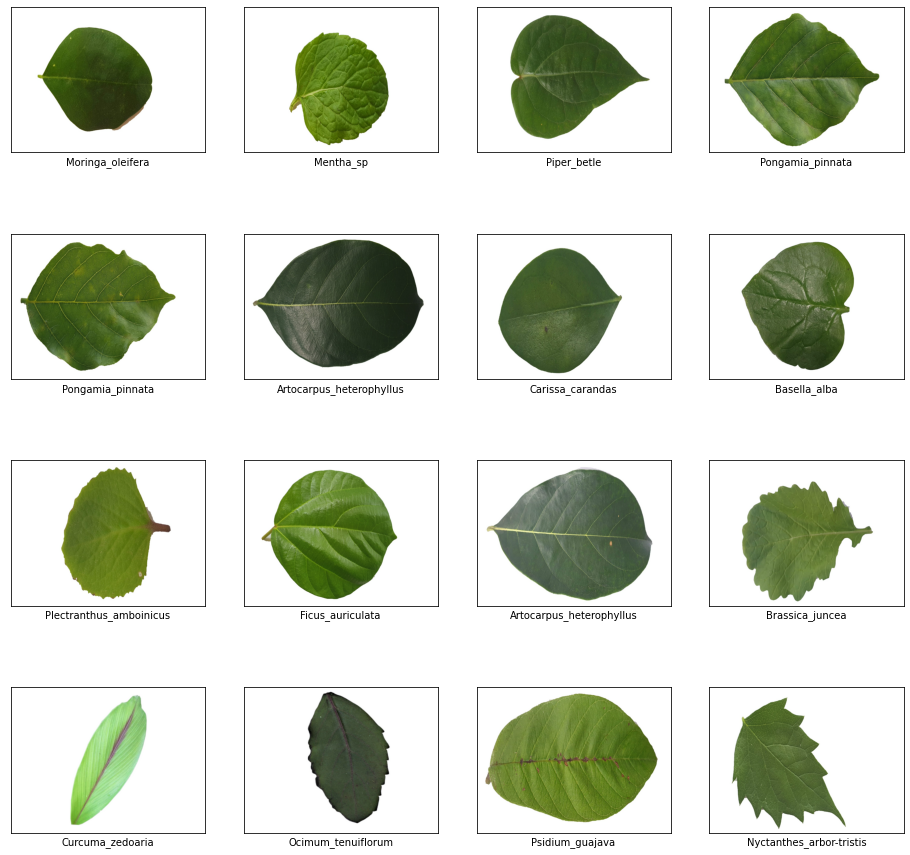

In [5]:
plt.figure(figsize=(16, 16))
for i, (image, label) in enumerate(
    data.gen_dataset().unbatch().take(16)):
  plt.subplot(4, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])

plt.show()

In [6]:
model = image_classifier.create(train_data,
                                epochs=10,
                                validation_data=validation_data,
                                model_spec=model_spec.get("efficientnet_lite1"))

INFO:tensorflow:Retraining the models...


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              4189344   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 23)                29463     
Total params: 4,218,807
Trainable params: 29,463
Non-trainable params: 4,189,344
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
34/34 [==============================] - 140s 4s/step - loss: 2.6496 - accuracy: 0.2987 - val_loss: 1.9286 - val_accuracy: 0.6562
Epoch 2/10
34/34 [==============================] - 137s 4s/step - loss: 1.6205 - accuracy: 0.7463 - val_loss: 1.3502 - val_accuracy: 0.8203
Epoch 3/10
34/34 [==============================] - 139s 4s/step - loss: 1.2399 - accuracy: 0.8722 - val_loss: 1.1424 - val_accuracy: 0.8750
Epoch 4/10
34/34 [==============================] - 146s 4s/step - loss: 1.0865 - accuracy: 0.9219 - val_loss: 1.0311 - val_accuracy: 0.9219
Epoch 5/10
34/34 [==============================] - 132s 4s/step - loss: 1.0053 - accuracy: 0.9393 - val_loss: 0.9766 - val_accuracy: 0.9375
Epoch 6/10
34/34 [==============================] - 131s 4s/step - loss: 0.9473 - accuracy: 0.9568 - val_loss: 0.9422 - val_accuracy: 0.9531
Epoch 7/10
34/34 [==============================] - 128s 4s/step - loss: 0.9202 - accuracy: 0.9642 - val_loss: 0.9163 - val_accuracy: 0.9609
Epoch 8/10
34

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              4189344   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 23)                29463     
Total params: 4,218,807
Trainable params: 29,463
Non-trainable params: 4,189,344
_________________________________________________________________


In [8]:
loss, accuracy = model.evaluate(test_data)

5/5 [==============================] - 24s 2s/step - loss: 0.8373 - accuracy: 0.9784


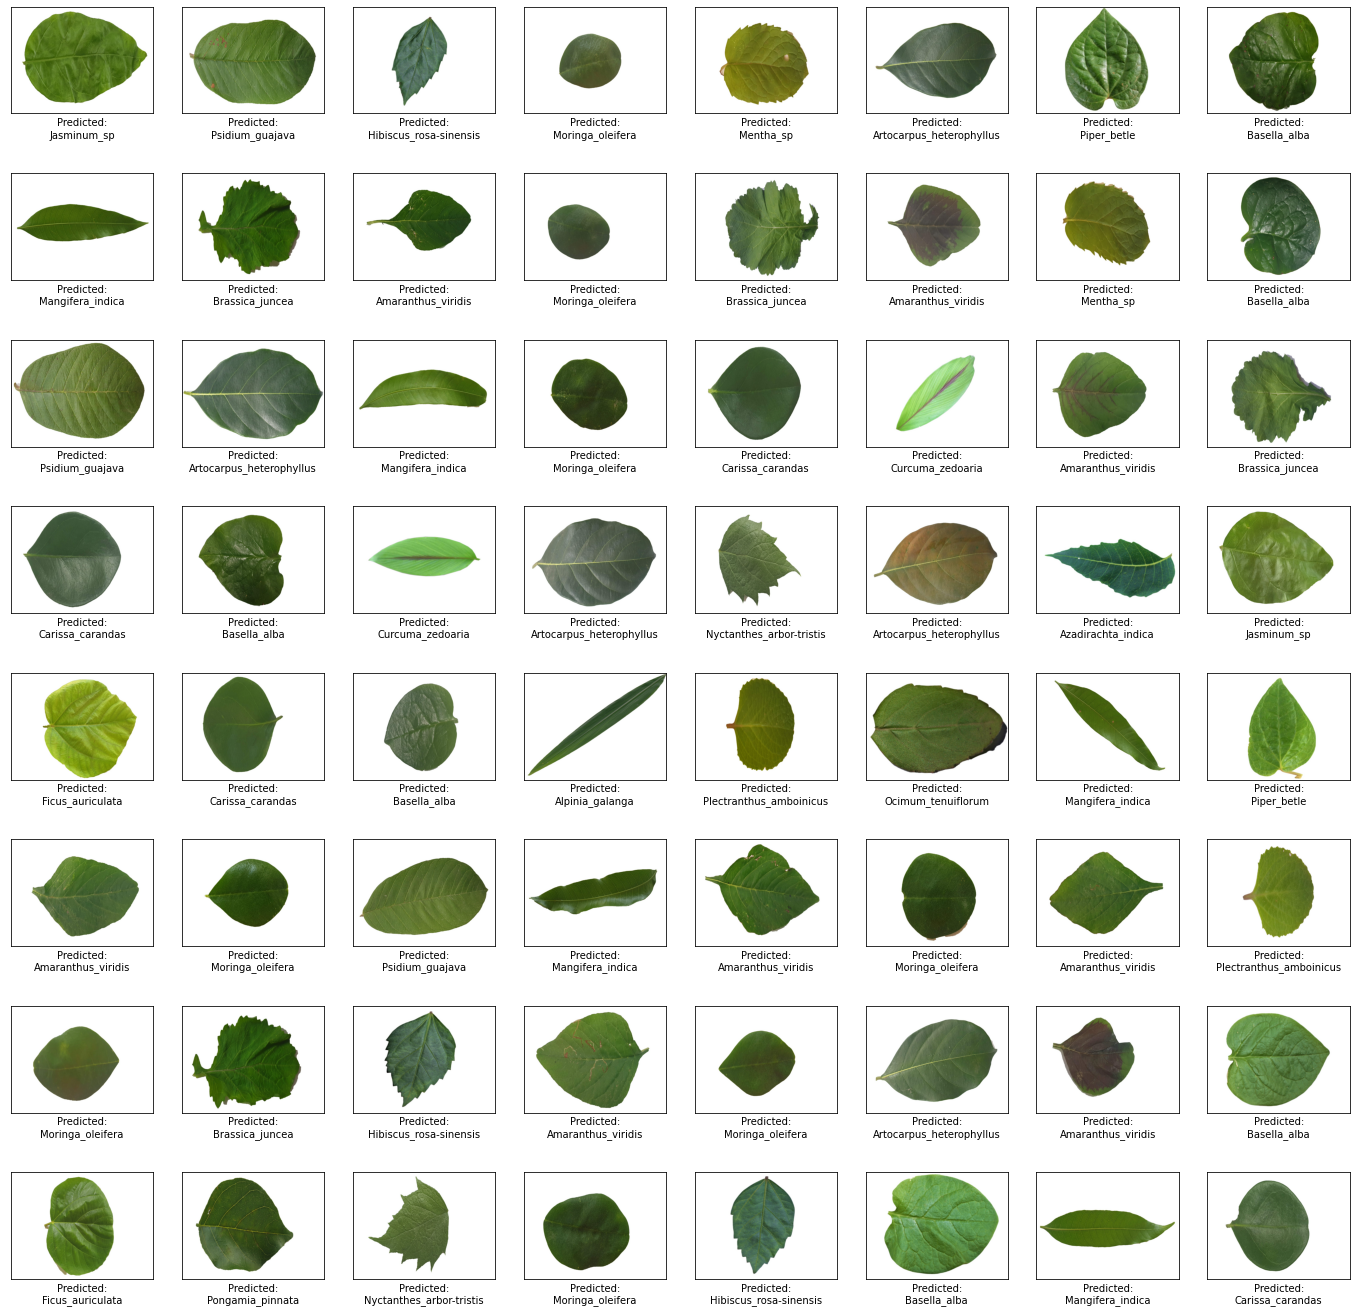

In [9]:

def get_label_color(predict_label, actual_label):
  if predict_label == actual_label:
    return "black"
  else:
    return "red"

plt.figure(figsize=(24, 24))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(
    test_data.gen_dataset().unbatch().take(64)):
  ax = plt.subplot(8, 8, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel("Predicted:\n{}".format(predict_label))

plt.show()

In [10]:
model.export(export_dir=".")

INFO:tensorflow:Assets written to: /tmp/tmpxw7ct7rs/assets


INFO:tensorflow:Assets written to: /tmp/tmpxw7ct7rs/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpjj7iknj_/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpjj7iknj_/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


In [11]:
model.export(export_dir=".", export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in ./labels.txt


INFO:tensorflow:Saving labels in ./labels.txt


In [12]:
model.evaluate_tflite("model.tflite", test_data)

{'accuracy': 0.9856115107913669}

In [13]:
model.export(export_dir=".")

INFO:tensorflow:Assets written to: /tmp/tmpp67gw9q6/assets


INFO:tensorflow:Assets written to: /tmp/tmpp67gw9q6/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpx_95afy0/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpx_95afy0/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite
